First, import all the necessary libraries as well as the csv data

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import numpy as np

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 7043


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Collecting details of the data to find and process **the missing values**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The following code is the process to find empty value since majority of the data still in *object* data type

In [ ]:
for i in data.columns:
    print(i)
    print(data[data[i] == ' '].index)

customerID
Int64Index([], dtype='int64')
gender
Int64Index([], dtype='int64')
SeniorCitizen
Int64Index([], dtype='int64')
Partner
Int64Index([], dtype='int64')
Dependents
Int64Index([], dtype='int64')
tenure
Int64Index([], dtype='int64')
PhoneService
Int64Index([], dtype='int64')
MultipleLines
Int64Index([], dtype='int64')
InternetService
Int64Index([], dtype='int64')
OnlineSecurity
Int64Index([], dtype='int64')
OnlineBackup
Int64Index([], dtype='int64')
DeviceProtection
Int64Index([], dtype='int64')
TechSupport
Int64Index([], dtype='int64')
StreamingTV
Int64Index([], dtype='int64')
StreamingMovies
Int64Index([], dtype='int64')
Contract
Int64Index([], dtype='int64')
PaperlessBilling
Int64Index([], dtype='int64')
PaymentMethod
Int64Index([], dtype='int64')
MonthlyCharges
Int64Index([], dtype='int64')
TotalCharges
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Churn
Int64Index([], dtype='int64')


We convert the TotalCharges in to numerical data type with error handling 'coerce' to leave the empty *object* datatype as **null**

In [ ]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now we find that there are 11 null data in TotalCharges

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

it is possible to either **drop rows** which contain null data or **fill it with mean of the column**. In this case, the mean fill all the null data

In [ ]:
mean_value=data['TotalCharges'].mean()
data['TotalCharges'].fillna(value=mean_value, inplace=True)

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.drop(['customerID'], axis = 1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### We move in to the process to **encode the categorical data** probably to numerical to ease the process later for analytics

We utilizing Sklearn preprocessing function of label encoder to encode all the categorical object data.

first, we find list of column that store categorical object data

In [ ]:
new_data = data.drop('customerID', 1)
s = (new_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Start utilizing the funtion of LabelEncoder that are provided by SKlearn

In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    new_data[i]=new_data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [ ]:
new_data.info()
new_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Last, Finding the **outlier** of the data

There are several methods to acknowledging the outlier. by visualising the data and also by statistical methods.

at first, utilising the visualisation method seems convinient. but, the data frame is to big to be visualised. frankly speaking, it cost a lot of processing time as well as resources.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

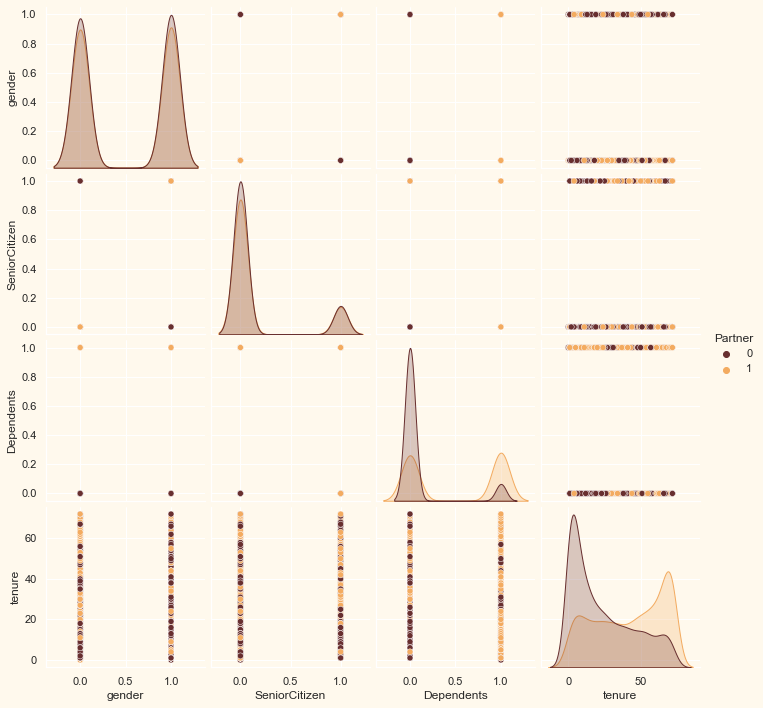

<Figure size 1440x1440 with 0 Axes>

In [ ]:
from matplotlib.pyplot import figure

#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(new_data[To_Plot], hue='Partner',palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.figure(figsize=(20, 20))
plt.show()

For medium-to-huge data that currently in the process, statistical method will reduce much of the process complexity

in this case, Interquartile range is utilised to find the outlier. Interquartile range is a range that acknowledging the spread of the data in the middle range. this can be achieved by substracting the third quarter and the first quarter

Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.

Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

In [ ]:
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

gender                 1.000
SeniorCitizen          0.000
Partner                1.000
Dependents             1.000
tenure                46.000
PhoneService           0.000
MultipleLines          2.000
InternetService        1.000
OnlineSecurity         2.000
OnlineBackup           2.000
DeviceProtection       2.000
TechSupport            2.000
StreamingTV            2.000
StreamingMovies        2.000
Contract               1.000
PaperlessBilling       1.000
PaymentMethod          1.000
MonthlyCharges        54.350
TotalCharges        3384.375
Churn                  1.000
dtype: float64


In [ ]:
iqr=(new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR))

print(new_data < (Q1 - 1.5 * IQR)) or (new_data > (Q3 + 1.5 * IQR))

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      False          False    False       False   False          True   
1      False          False    False       False   False         False   
2      False          False    False       False   False         False   
3      False          False    False       False   False          True   
4      False          False    False       False   False         False   
...      ...            ...      ...         ...     ...           ...   
7038   False          False    False       False   False         False   
7039   False          False    False       False   False         False   
7040   False          False    False       False   False          True   
7041   False          False    False       False   False         False   
7042   False          False    False       False   False         False   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             False            False     

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
col = []
rw = []
n=0
for x in iqr.columns:
    for y in range(0, len(iqr)):
#         print(iqr[x][y])
        if (iqr[x][y]== (1==1)):
            print(iqr[x][y])
            col.append(x)
            rw.append(y)
            n=n+1
            
print('amount of outliers '+ str(n))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


amount of outliers 1824


In [ ]:
from collections import Counter

Counter(col)

Counter({'SeniorCitizen': 1142, 'PhoneService': 682})

We acknowledge the overwhelming outlier come from SeniorCitizen and PhoneService. the assumption here that both detected SeniorCitizen and PhoneService outliers is not fully outlier. logically, probably there are extremely less people who are considered senior and also use phone service